# Lab DL 01: Deep Neural Network
Nama : Muhammad Fikrizza

NIM  : 2000018096


# **1. Pendahuluan**

In this lab work you will practice putting together a simple image classification pipeline, based on Deep Neural Network classifier.

The goals of this assignment are as follows:

1. understand the basic Multi-class Classification pipeline using Multilayer Perceptron
2. implement implement Deep Neural Network API


## Single Layer Perceptron
As we've seen in previous exercises, Single Layer Perceptron is essentially a Linear Classifier. With only one layer in the network, the architecture illustration is as described below


![onelayer](https://image.ibb.co/fjR3oz/onelayer.png)

## Multi Layer Perceptron
We can further stacks the layers of neuron into a deeper architecture called Multi-Layer Perceptron (MLP). Layers located between input and output layer are called hidden layers.

MLP with 2 neuron layers called *2-Layer Neural Network* or *1-Hidden Neural Network*. The same apply for MLP with 3 layers called *3-Layer Neural Net* or *2-Hidden Neural Net*. Below are the illustration of 2-layer and 3-layer net

*2-layer NN* | *3-layer NN*
- | -
![2layerNN](https://image.ibb.co/dHnnFe/2layerNN.png) | ![3layerNN](https://image.ibb.co/iH18MK/3layerNN.png)

## Deep Neural Network
* In this part, we'll increase the network capacity by increasing the number of hidden layers
* And since we're using more layers, we'll train it a little bit longer



# **2. Mounting Google Drive**

In [ ]:
from google.colab import drive
from os.path import join, exists

# mounting dataset dari gdrive
drive.mount('/content/gdrive', force_remount=True)

# folder ini juga digunakan untuk menyimpan model yang sudah dilatih
root_path = 'gdrive/My Drive/Colab Notebooks/Deep Learning Labs/LabDL01 Data/'

# opsional - tampilkan info lokasi dataset
print("Path root:", root_path)

Mounted at /content/gdrive
Path root: gdrive/My Drive/Colab Notebooks/Deep Learning Labs/LabDL01 Data/


# **3. Download Dataset**
Kita menggunakan Fashion MNIST Dataset yang terdiri 10 kelas.

In [1]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

# download fashion mnist dataset
(X_data, y_data), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# kategori pada dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# bagi data latih untuk mendapatkan data validasi dengan rasio 70% - 30%
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data,
                                                  test_size=0.3,
                                                  random_state=42)

y_train = y_train.ravel()
y_val = y_val.ravel()
y_test = y_test.ravel()

# tampilkan informasi dataset
num_class = len(class_names)
print('Jumlah kelas:', num_class)
print('Label kelas:', class_names)
print('Dimensi data latih:', X_train.shape)
print('Dimensi data validasi:', X_val.shape)
print('Dimensi data uji:', X_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
Jumlah kelas: 10
Label kelas: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Dimensi data latih: (42000, 28, 28)
Dimensi data validasi: (18000, 28, 28)
Dimensi data uji: (10000, 28, 28)


Visualisasi data

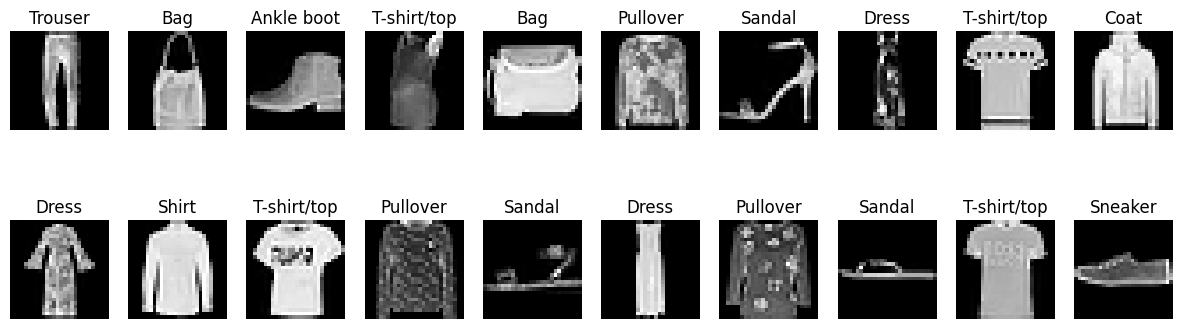

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,10,figsize=(15,4.5))
for j in range(0,2):
    for i in range(0, 10):
        ax[j,i].imshow(X_train[i+j*10], cmap='gray')
        ax[j,i].set_title(class_names[y_train[i+j*10]])
        ax[j,i].axis('off')
plt.show()

Persiapkan dataset

In [ ]:
# gunakan one-hot encoding untuk mengubah label data
# misalnya pada sampel index-0
print('Sebelum one-hot processing:', y_train[0])

y_train_label = tf.keras.utils.to_categorical(y_train, num_classes=num_class)
y_val_label = tf.keras.utils.to_categorical(y_val, num_classes=num_class)
y_test_label = tf.keras.utils.to_categorical(y_test, num_classes=num_class)

print('Setelah one-hot processing:', y_train_label[0])

Sebelum one-hot processing: 1
Setelah one-hot processing: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# terapkan batch
batch_size = 32
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train_label)).batch(batch_size)
val_data = tf.data.Dataset.from_tensor_slices((X_val, y_val_label)).batch(batch_size)
test_data = tf.data.Dataset.from_tensor_slices((X_test, y_test_label)).batch(1)

print('Jumlah data latih:', len(X_train))
print('Jumlah data latih setelah di batch:', len(train_data))

Jumlah data latih: 42000
Jumlah data latih setelah di batch: 1313


# **7. Post Test**
1. Copy kode di Model 3: Deep Neural Network yang sudah anda perbaiki
2. Buat teks baru dibawah kode Model 3 tersebut dan diberi nama **Model 4: Post Test**
3. Buat kode baru dibawah teks tersebut lalu paste kode dari Model 3 di soal nomor 1.
4. **Modifikasi jumlah neuron pada setiap layer atau tambah hidden layernya dan tambah jumlah epoch** yang ada di bagian Pelatihan Model, sehingga anda bisa mendapatkan akurasi pelatihan, validasi dan pengujian yang lebih tinggi dari model 1, 2 dan 3 sebelumnya.
5. Jalankan kode untuk pelatihan sampai evaluasi dengan model Post Test tersebut.
6. Cermati hasil akurasi pengujiannya!

**Semakin tinggi akurasi yang anda dapatkan dibandingkan dengan hasil akurasi Model 3 maka semakin baik nilai post test anda**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import Adam

# define rescale normalization
norm_ratio = 1./255
norm_offset = 0

# initialize the optimizer and compile the model
init_learning_rate = 1e-4
opt_optimizer = Adam(learning_rate=init_learning_rate)

# input layer
input_size = (28, 28)
inputs = Input(shape=input_size)

# preprocessing layer untuk menormalisasi piksel
preprocess_layer = tf.keras.layers.experimental.preprocessing.Rescaling(
    scale=norm_ratio, offset=norm_offset)(inputs)

# flatten input data sebelum masuk ke fully connected layer
flatten_layer = Flatten()(preprocess_layer)

In [ ]:
# deep neural network
# input layer - multiple hidden layers - output layer

# hidden layer 0
hidden_layer = Dense(1024, activation='softmax')(flatten_layer)

# hidden layer 1
hidden_layer = Dense(512, activation='softmax')(flatten_layer)

# hidden layer 2
hidden_layer = Dense(256, activation='softmax')(flatten_layer)

# hidden layer 3
hidden_layer = Dense(128, activation='softmax')(flatten_layer)

# hidden layer 4
hidden_layer = Dense(64, activation='softmax')(flatten_layer)

# output layer
output_layer = Dense(num_class, activation='softmax')(hidden_layer)

# build model
main_model = Model(inputs=inputs, outputs=output_layer, name='dnn_model')

main_model.compile(optimizer=opt_optimizer,
                   loss=tf.losses.categorical_crossentropy,
                   loss_weights=1.0, metrics=['accuracy'])
main_model.summary()

# Path to save the best model.
checkpoint_filepath = join(root_path, 'postest_model.h5')

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath, save_weights_only=False,
    monitor='val_loss', verbose=1, mode='auto', save_best_only=True)

Model: "dnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 rescaling_4 (Rescaling)     (None, 28, 28)            0         
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_70 (Dense)            (None, 64)                50240     
                                                                 
 dense_71 (Dense)            (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# mulai pelatihan dengan n epochs
epochs = 10
history = main_model.fit(train_data,
                         batch_size=batch_size,
                         validation_data=val_data,
                         epochs=epochs,
                         callbacks=[model_checkpoint_callback],
                         verbose=1)

Epoch 1/10
1297/1313 [============================>.] - ETA: 0s - loss: 2.1046 - accuracy: 0.5141
Epoch 1: val_loss improved from inf to 1.98425, saving model to gdrive/My Drive/Colab Notebooks/Deep Learning Labs/LabDL01 Data/postest_model.h5
1313/1313 [==============================] - 6s 4ms/step - loss: 2.1031 - accuracy: 0.5153 - val_loss: 1.9843 - val_accuracy: 0.6082
Epoch 2/10
1313/1313 [==============================] - ETA: 0s - loss: 1.8929 - accuracy: 0.6647
Epoch 2: val_loss improved from 1.98425 to 1.81205, saving model to gdrive/My Drive/Colab Notebooks/Deep Learning Labs/LabDL01 Data/postest_model.h5
1313/1313 [==============================] - 6s 4ms/step - loss: 1.8929 - accuracy: 0.6647 - val_loss: 1.8121 - val_accuracy: 0.6843
Epoch 3/10
1306/1313 [============================>.] - ETA: 0s - loss: 1.7373 - accuracy: 0.6986
Epoch 3: val_loss improved from 1.81205 to 1.67281, saving model to gdrive/My Drive/Colab Notebooks/Deep Learning Labs/LabDL01 Data/postest_model.

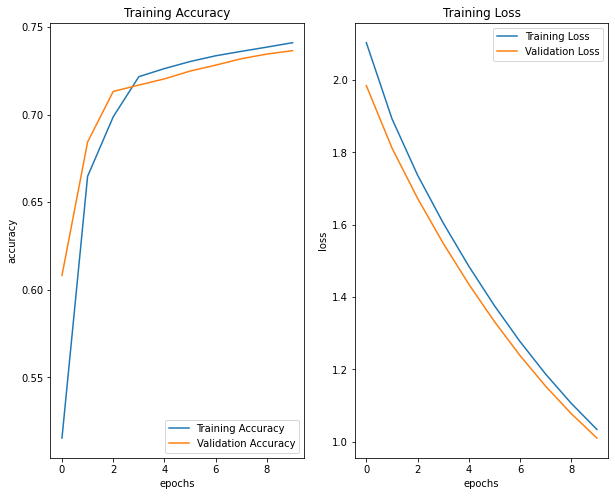

In [ ]:
# ambil statistik pelatihan
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

# plot hasil akurasi pelatihan
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.title('Training Accuracy')

# plot hasil loss pelatihan
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title('Training Loss')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

# load hasil pelatihan untuk di uji
trained_model = load_model(checkpoint_filepath)

# pengujian dengan data uji
trained_model.evaluate(test_data, verbose=1)

10000/10000 [==============================] - 24s 2ms/step - loss: 1.0123 - accuracy: 0.7358


[1.0123142004013062, 0.73580002784729]

1/1 [==============================] - 0s 20ms/step


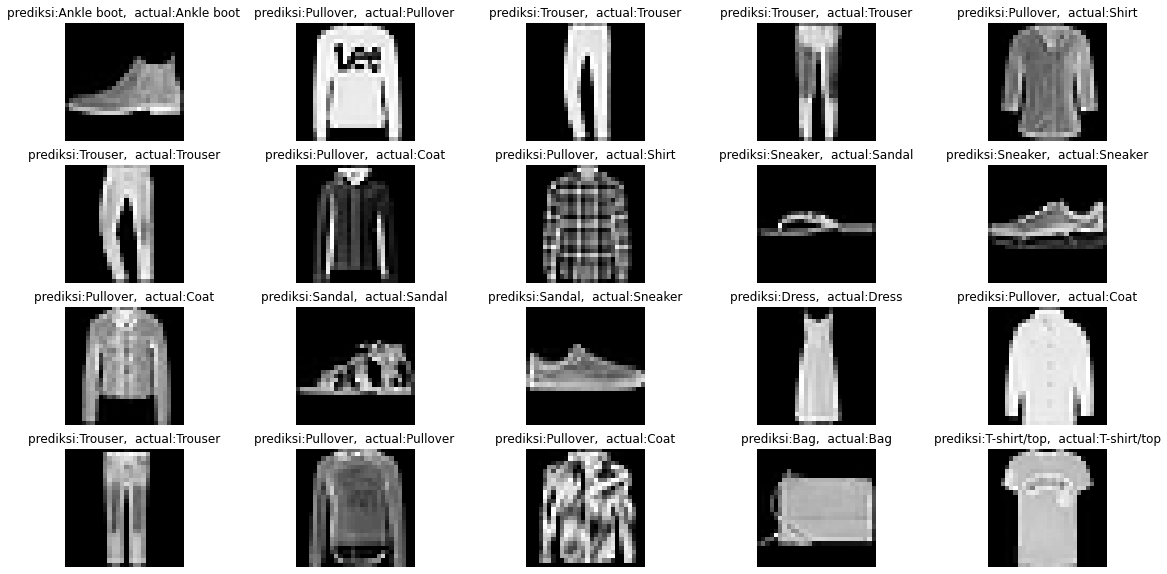

In [ ]:
# tampilkan misalnya 20 citra pada dataset
nimages = 20
ncols_plot = 5
nrows_plot = nimages//ncols_plot

plot_frame = plt.figure(figsize=(20,10))
for i in range(nimages):

    # lakukan prediksi pada data uji
    img = np.expand_dims(X_test[i], axis=0)
    prediction = np.argmax(trained_model.predict(img))

    ax = plot_frame.add_subplot(nrows_plot, ncols_plot, i+1)
    ax.axis('off')
    ax.set_title("prediksi:" + class_names[prediction] + \
                 ",  actual:" + class_names[y_test[i]])
    plt.imshow(np.uint8(X_test[i]), cmap='gray')

# **4. Membangun Model**

## **Model 1: Single Layer Perceptron**
Jalankan kode ini di sesuai instruksi di modul

In [ ]:
# single layer perceptron
# input layer - output layer

# output layer
output_layer = Dense(num_class, activation='softmax')(flatten_layer)

# build model
main_model = Model(inputs=inputs, outputs=output_layer, name='single_layer_model')

main_model.compile(optimizer=opt_optimizer,
                   loss=tf.losses.categorical_crossentropy,
                   loss_weights=1.0, metrics=['accuracy'])
main_model.summary()

# Path to save the best model.
checkpoint_filepath = join(root_path, 'single_layer_model.h5')

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath, save_weights_only=False,
    monitor='val_loss', verbose=1, mode='auto', save_best_only=True)

Model: "single_layer_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 rescaling_2 (Rescaling)     (None, 28, 28)            0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_40 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


## **Model 2: Multi Layers Perceptron**
Jalankan kode ini di sesuai instruksi di modul


In [ ]:
# multi layer perceptron
# input layer - hidden layer - output layer

# hidden layer dengan 100 unit neuron dan fungsi aktivasi relu
hidden_layer = Dense(100, activation='relu')(flatten_layer)

# output layer
output_layer = Dense(num_class, activation='softmax')(hidden_layer)

# build model
main_model = Model(inputs=inputs, outputs=output_layer, name='multi_layer_model')

main_model.compile(optimizer=opt_optimizer,
                   loss=tf.losses.categorical_crossentropy,
                   loss_weights=1.0, metrics=['accuracy'])
main_model.summary()

# Path to save the best model.
checkpoint_filepath = join(root_path, 'multi_layer_model.h5')

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath, save_weights_only=False,
    monitor='val_loss', verbose=1, mode='auto', save_best_only=True)

Model: "multi_layer_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 rescaling_2 (Rescaling)     (None, 28, 28)            0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_41 (Dense)            (None, 100)               78500     
                                                                 
 dense_42 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


## **Model 3: Deep Neural Network**
Jalankan kode ini di sesuai instruksi di modul

**Lengkapi Kode Berikut!**

Perbaiki kode pada bagian Model 3: Deep Neural Network agar arsitekturnya menjadi sebagai berikut:


1. Hidden layer-1 dengan unit neuron 512 dan fungsi aktivasi relu
2. Hidden layer-2 dengan unit neuron 256 dan fungsi aktivasi relu
3. Hidden layer-3 dengan unit neuron 128 dan fungsi aktivasi relu
4. Hidden layer-4 dengan unit neuron 64 dan fungsi aktivasi relu

Anda bisa melihat pada contoh di Model 2: Multi Layers Perceptron
sebagai referensi untuk menambahkan hidden layer pada model.

In [ ]:
# deep neural network
# input layer - multiple hidden layers - output layer

# hidden layer 1
hidden_layer = Dense(512, activation='relu')(flatten_layer)

# hidden layer 2
hidden_layer = Dense(256, activation='relu')(flatten_layer)

# hidden layer 3
hidden_layer = Dense(128, activation='relu')(flatten_layer)

# hidden layer 4
hidden_layer = Dense(64, activation='relu')(flatten_layer)

# output layer
output_layer = Dense(num_class, activation='softmax')(hidden_layer)

# build model
main_model = Model(inputs=inputs, outputs=output_layer, name='dnn_model')

main_model.compile(optimizer=opt_optimizer,
                   loss=tf.losses.categorical_crossentropy,
                   loss_weights=1.0, metrics=['accuracy'])
main_model.summary()

# Path to save the best model.
checkpoint_filepath = join(root_path, 'dnn_model.h5')

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath, save_weights_only=False,
    monitor='val_loss', verbose=1, mode='auto', save_best_only=True)

Model: "dnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 rescaling_2 (Rescaling)     (None, 28, 28)            0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_46 (Dense)            (None, 64)                50240     
                                                                 
 dense_47 (Dense)            (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


# **5. Pelatihan Model**

In [ ]:
# mulai pelatihan dengan n epochs
epochs = 5
history = main_model.fit(train_data,
                         batch_size=batch_size,
                         validation_data=val_data,
                         epochs=epochs,
                         callbacks=[model_checkpoint_callback],
                         verbose=1)

Epoch 1/5
1297/1313 [============================>.] - ETA: 0s - loss: 0.8926 - accuracy: 0.7234
Epoch 1: val_loss improved from inf to 0.59805, saving model to gdrive/My Drive/Colab Notebooks/Deep Learning Labs/LabDL01 Data/dnn_model.h5
1313/1313 [==============================] - 7s 5ms/step - loss: 0.8892 - accuracy: 0.7242 - val_loss: 0.5981 - val_accuracy: 0.8076
Epoch 2/5
1301/1313 [============================>.] - ETA: 0s - loss: 0.5463 - accuracy: 0.8198
Epoch 2: val_loss improved from 0.59805 to 0.51182, saving model to gdrive/My Drive/Colab Notebooks/Deep Learning Labs/LabDL01 Data/dnn_model.h5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.5460 - accuracy: 0.8198 - val_loss: 0.5118 - val_accuracy: 0.8306
Epoch 3/5
1309/1313 [============================>.] - ETA: 0s - loss: 0.4877 - accuracy: 0.8353
Epoch 3: val_loss improved from 0.51182 to 0.47318, saving model to gdrive/My Drive/Colab Notebooks/Deep Learning Labs/LabDL01 Data/dnn_model.h5
1313/1313 [=

Statistik pelatihan

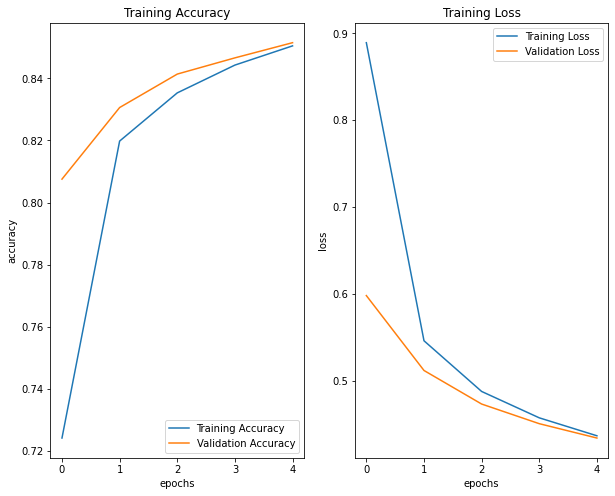

In [ ]:
# ambil statistik pelatihan
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

# plot hasil akurasi pelatihan
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.title('Training Accuracy')

# plot hasil loss pelatihan
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title('Training Loss')
plt.show()

# **6. Evaluasi Model**

In [ ]:
from tensorflow.keras.models import load_model

# load hasil pelatihan untuk di uji
trained_model = load_model(checkpoint_filepath)

# pengujian dengan data uji
trained_model.evaluate(test_data, verbose=1)

10000/10000 [==============================] - 28s 3ms/step - loss: 0.4616 - accuracy: 0.8395


[0.46164339780807495, 0.8395000100135803]

Tampilkan sampel hasil prediksi

1/1 [==============================] - 0s 84ms/step


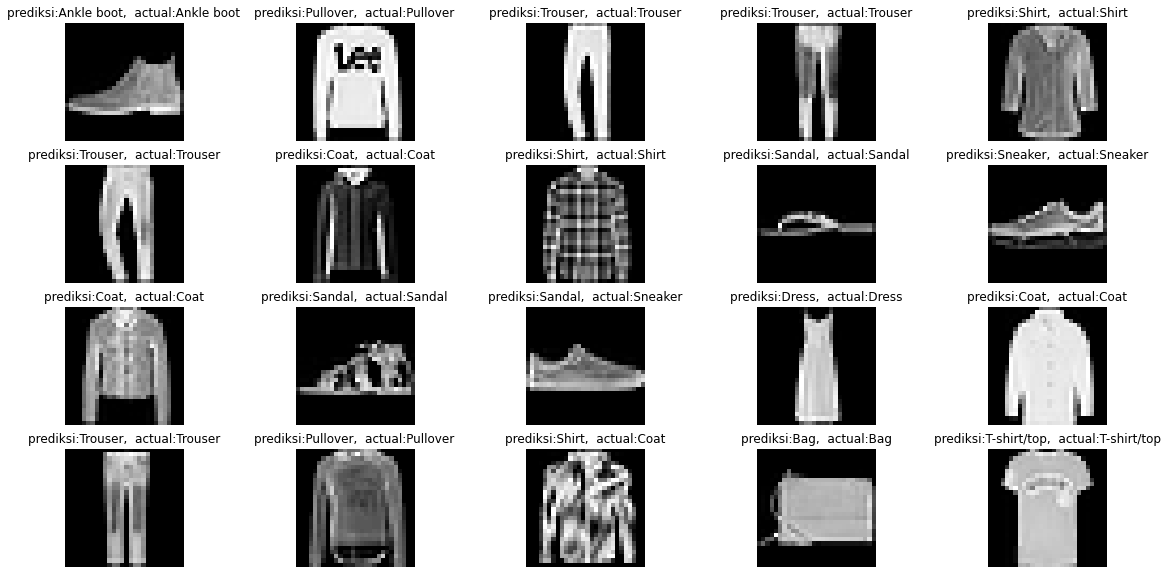

In [ ]:
# tampilkan misalnya 20 citra pada dataset
nimages = 20
ncols_plot = 5
nrows_plot = nimages//ncols_plot

plot_frame = plt.figure(figsize=(20,10))
for i in range(nimages):

    # lakukan prediksi pada data uji
    img = np.expand_dims(X_test[i], axis=0)
    prediction = np.argmax(trained_model.predict(img))

    ax = plot_frame.add_subplot(nrows_plot, ncols_plot, i+1)
    ax.axis('off')
    ax.set_title("prediksi:" + class_names[prediction] + \
                 ",  actual:" + class_names[y_test[i]])
    plt.imshow(np.uint8(X_test[i]), cmap='gray')